In [6]:
#importing the required lib
import pandas as pd

In [9]:
# reading the csv
df = pd.read_csv('../data/benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [13]:
# Summary statistics
df.describe()

# Missing value report
missing_report = df.isna().sum().sort_values(ascending=False)
missing_percent = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_report,
    'Percent Missing': missing_percent
})
missing_df[missing_df['Percent Missing'] > 5]

,Missing Values,Percent Missing
Comments,525600,100.0


In [20]:
from scipy.stats import zscore
import numpy as np


# Key columns to inspect
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Z-score
z_scores = df[key_cols].apply(zscore)
outliers = (z_scores.abs() > 3)

# Count of outliers
outliers.sum()

# Replace outliers with NaN
df_clean = df.copy()
df_clean[key_cols] = df_clean[key_cols].mask(outliers)

# Impute missing with median
df_clean[key_cols] = df_clean[key_cols].fillna(df_clean[key_cols].median())

<Axes: title={'center': 'Solar Irradiance & Tamb over Time'}, xlabel='Timestamp'>

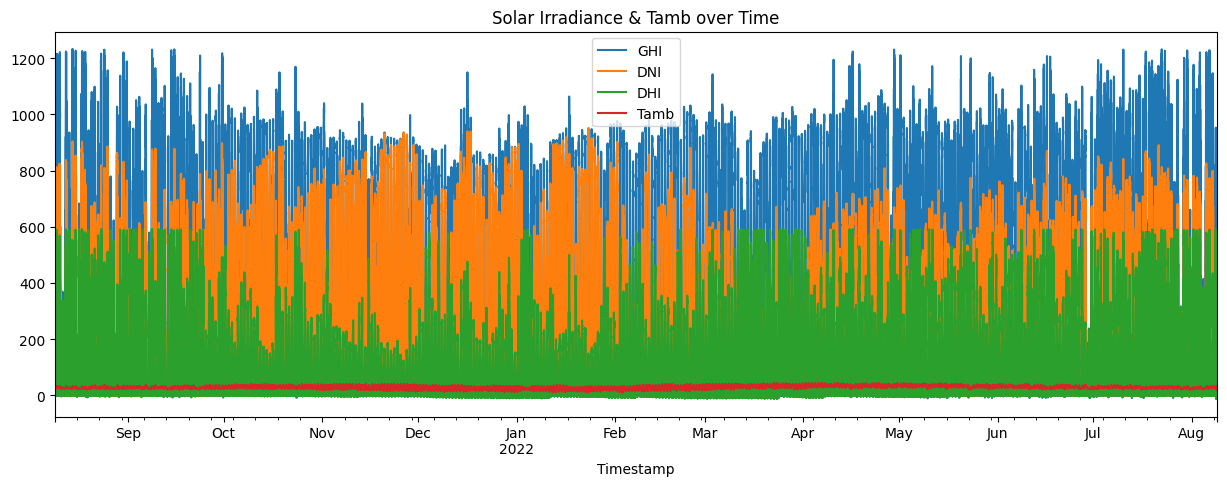

In [21]:
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,5), title='Solar Irradiance & Tamb over Time')


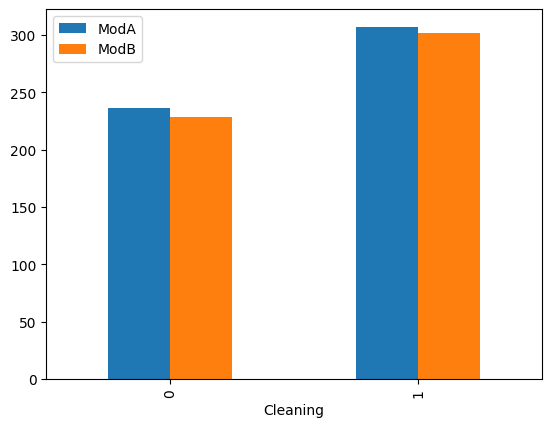

In [23]:
# Group by cleaning flag if available (assuming column 'Cleaning')
if 'Cleaning' in df_clean.columns:
    df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')


<Axes: xlabel='WS', ylabel='GHI'>

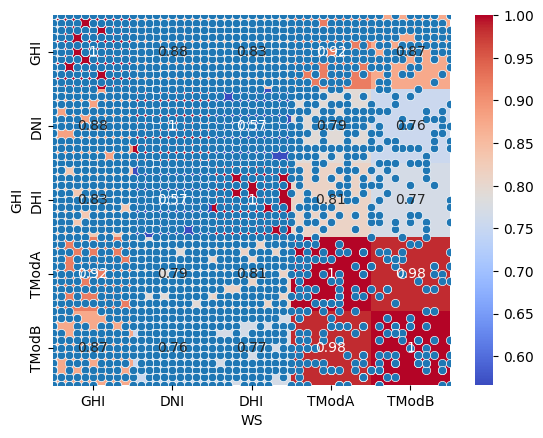

In [24]:
import seaborn as sns

# Heatmap
corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Scatter plots
sns.scatterplot(x='WS', y='GHI', data=df_clean)
sns.scatterplot(x='RH', y='Tamb', data=df_clean)


In [ ]:
# Histogram
df_clean['GHI'].hist(bins=50)

# Optional wind rose (use windrose module or matplotlib polar)
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
